<a href="https://colab.research.google.com/github/mdr356/Palantir-STOCK-RNN/blob/master/Palantir_STOCK_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Assuming the actual column names in your CSV file are 'open', 'high', 'low', 'close', 'volume', 'dividends'
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stock/palantir-stock-historical-pricing.csv')


data.head()

,Date,Open,High,Low,Close,Volume
0,10/9/24,41.55,43.34,41.210,43.13,85897500
1,10/8/24,39.29,41.49,39.015,41.45,62542953
2,10/7/24,39.90,40.15,38.775,38.89,44124770
3,10/4/24,39.65,40.29,39.400,40.01,62657551
4,10/3/24,37.45,39.29,37.370,39.24,57196449


In [4]:
eighty_pct = 0.8*data.shape[0]
twenty_pct = 0.2 * data.shape[0]

# delete data column
data = np.delete(data, 0, axis=1)

print(eighty_pct, twenty_pct)

train_data = data[0:int(eighty_pct)]
test_data = data[int(eighty_pct):]

train_data.shape, test_data.shape

202.4 50.6


((202, 5), (51, 5))

In [5]:
# normalize [0-1]
scaler = MinMaxScaler()

train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

train_data

array([[1.        , 1.        , 1.        , 1.        , 0.15621771],
       [0.91257253, 0.93201554, 0.91407657, 0.93812155, 0.10213832],
       [0.93617021, 0.88277274, 0.90468175, 0.84383057, 0.05948948],
       ...,
       [0.07736944, 0.05777209, 0.06501996, 0.05267035, 0.03533569],
       [0.07079304, 0.05924203, 0.06873875, 0.05930018, 0.02792526],
       [0.08394584, 0.06585673, 0.05973538, 0.04677716, 0.09316299]])

In [6]:
X_train = []
y_train = []

# window size is 5 days
window_size = 5
for i in range(window_size, len(train_data)):
  X_train.append(train_data[i-window_size:i, :])
  y_train.append(train_data[i, 0])

X_train

[array([[1.        , 1.        , 1.        , 1.        , 0.15621771],
        [0.91257253, 0.93201554, 0.91407657, 0.93812155, 0.10213832],
        [0.93617021, 0.88277274, 0.90468175, 0.84383057, 0.05948948],
        [0.92649903, 0.88791751, 0.92914742, 0.88508287, 0.10240368],
        [0.84139265, 0.85116915, 0.84968292, 0.85672192, 0.08975804]]),
 array([[0.91257253, 0.93201554, 0.91407657, 0.93812155, 0.10213832],
        [0.93617021, 0.88277274, 0.90468175, 0.84383057, 0.05948948],
        [0.92649903, 0.88791751, 0.92914742, 0.88508287, 0.10240368],
        [0.84139265, 0.85116915, 0.84968292, 0.85672192, 0.08975804],
        [0.79690522, 0.79200429, 0.80173021, 0.79226519, 0.03833464]]),
 array([[0.93617021, 0.88277274, 0.90468175, 0.84383057, 0.05948948],
        [0.92649903, 0.88791751, 0.92914742, 0.88508287, 0.10240368],
        [0.84139265, 0.85116915, 0.84968292, 0.85672192, 0.08975804],
        [0.79690522, 0.79200429, 0.80173021, 0.79226519, 0.03833464],
        [0.83210

In [7]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape, y_train.shape

((197, 5, 5), (197,))

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.LSTM(units=60, activation='relu', return_sequences=True),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.LSTM(units=80, activation='relu', return_sequences=True),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.LSTM(units=120, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(units=1)
])

model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "google-stock-rnn.keras", save_best_only=True, monitor='loss')

history = model.fit(X_train, y_train, epochs=10, batch_size=32, callbacks=[model_checkpoint])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 5, 50)               │          11,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 5, 60)               │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 60)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 5, 80)               │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 5, 80)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 179,561 (701.41 KB)

 Trainable params: 179,561 (701.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 901ms/step - loss: 0.1535
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1296
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0740
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0382
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0340
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0256
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0205
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0148
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0117
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0127 


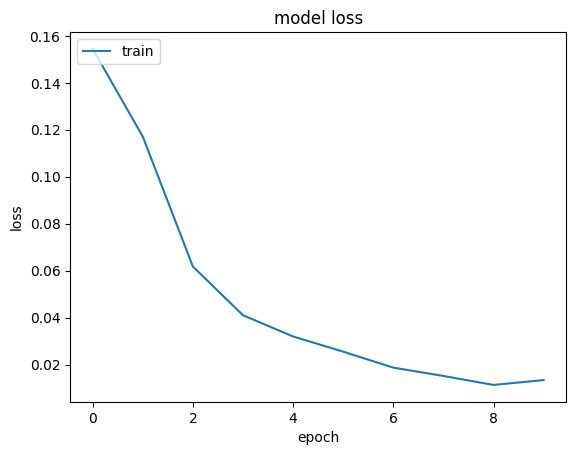

In [9]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

51
(46, 5, 5) (46,)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


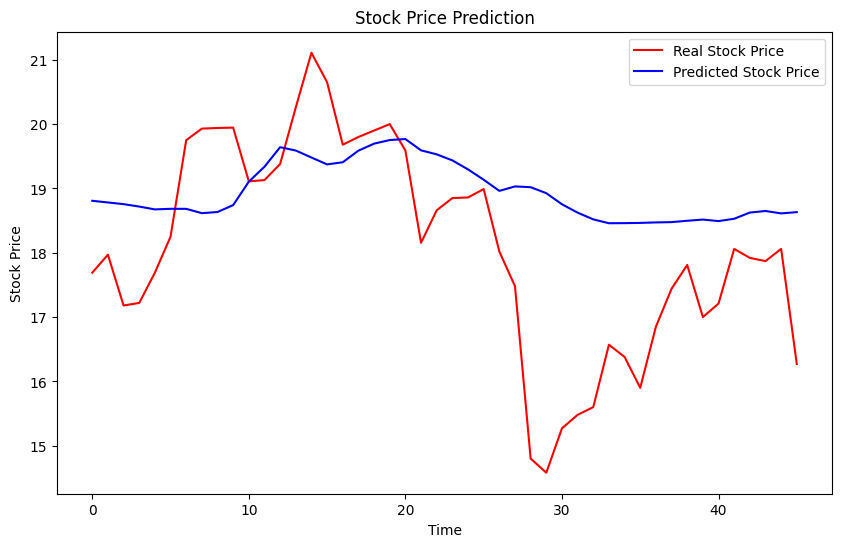

In [11]:
# Prepare the test data (similar to how training data was prepared)
X_test = []
y_test = []
print(len(test_data))

for i in range(window_size, len(test_data)):
    X_test.append(test_data[i-window_size:i, :])
    y_test.append(test_data[i, 0])  # Assuming you are predicting the "open" price or similar

X_test, y_test = np.array(X_test), np.array(y_test)
print(X_test.shape, y_test.shape)
# Check if X_test has any samples
if X_test.size == 0:
    print("X_test is empty. Please check your test data and window size.")
else:
    # Make predictions
    predicted_stock_price = model.predict(X_test)

    # Reshape predicted_stock_price to (46, 1, 1) to add a feature dimension
    predicted_stock_price = predicted_stock_price.reshape(-1, 1, 1)

    # Assuming 'scaler' was fitted on data with 5 features,
    # create a new scaler for the output which has only 1 feature.
    output_scaler = MinMaxScaler()

    # We need to fit output_scaler on the "Open" price feature from original data
    output_scaler.fit(data[:, 0].reshape(-1, 1))

    # Inverse transform using output_scaler to get predicted prices
    predicted_stock_price = output_scaler.inverse_transform(predicted_stock_price.reshape(-1, 1))

    # Inverse transform the actual test data (for comparison)
    # using the original scaler that was fitted on the full dataset
    real_stock_price = scaler.inverse_transform(test_data[window_size:, :])

    # Plot the actual vs predicted prices
    plt.figure(figsize=(10,6))
    plt.plot(real_stock_price[:, 0], color='red', label='Real Stock Price')  # Assuming you're comparing the "open" price
    plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
    plt.title('Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()